In [1]:
'''
Action1	智能供应链分析
数据集：SupplyChainDataset.csv，供应链采购数据
To Do：
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'
对于迟交货订单进行预测，即Delivery Status= 'Late delivery'
对于销售额进行预测，即Sales字段
对于订货数量进行预测，即Order Item Quantity"			

1、对欺诈订单进行预测（10points）
2、对迟交货订单进行预测（10points）
3、对销售额进行预测（10points）
4、对订货数量进行预测（10points）
5、对模型进行可解释性分析（10points）
'''
#接上节课内容
#pickle读取速度快
import pickle
with open('data.pkl','rb') as file:
    train_data = pickle.load(file)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.750000,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.750000,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.750000,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.750000,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,399.980011,0,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,2016-01
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,399.980011,0,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,2016-01
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,399.980011,0,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,2016-01
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,399.980011,0,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20,2016-01


In [2]:
#欺诈订单存在为1,不存在为0
import numpy as np
train_data['frand'] = np.where(train_data['Order Status'] == 'SUSPECTED_FRAUD',1,0)
train_data['frand']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: frand, Length: 180519, dtype: int32

In [3]:
print(train_data['frand'].sum())#欺诈订单量

4062


In [4]:
train_data['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [5]:
#对于迟交货订单进行预测，即Delivery Status= 'Late delivery'
train_data['Late delivery'] = np.where(train_data['Delivery Status'] == 'Late delivery',1,0)
train_data['Late delivery'] 

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late delivery, Length: 180519, dtype: int32

In [6]:
train_data.info()#object        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 61 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [7]:
#分类
cat_cols= train_data.select_dtypes(include='object').columns
cat_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [8]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [9]:
#去掉一些字段,避免标签泄露
train_data.drop(['Order Status','Delivery Status','Late_delivery_risk'],axis=1,inplace=True)

In [10]:
#删除一些不需要的字段,对结果预测没价值的
#train_data['Customer Email'].value_counts()
#train_data['Customer Password'].value_counts()
for column in train_data.columns:
    if len(train_data[column].value_counts())<2:
        print(column)

Customer Email
Customer Password
Product Description
Product Status


In [11]:
train_data['Product Image'].value_counts()

http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck                                 24515
http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat                        22246
http://images.acmesports.sports/Nike+Men%27s+Dri-FIT+Victory+Golf+Polo                           21035
http://images.acmesports.sports/O%27Brien+Men%27s+Neoprene+Life+Vest                             19298
http://images.acmesports.sports/Field+%26+Stream+Sportsman+16+Gun+Fire+Safe                      17325
                                                                                                 ...  
http://images.acmesports.sports/Stiga+Master+Series+ST3100+Competition+Indoor+Table+Tennis...       27
http://images.acmesports.sports/SOLE+E35+Elliptical                                                 15
http://images.acmesports.sports/Bushnell+Pro+X7+Jolt+Slope+Rangefinder                              11
http://images.acmesports.sports/Bowflex+SelectTech+1090+Dumbbells        

In [12]:
train_data.drop(['Customer Email','Customer Password','Product Description',\
                'Product Status','Product Image','Customer Lname','Customer Fname'],axis=1,inplace=True)

In [13]:
len(train_data.columns)

51

In [14]:
#根据热力图,去掉一个方向的特征
train_data.drop(['Order Customer Id',
'Order Item Cardprod Id',
'Order Item Id',
'Sales per customer',
'Order Item Total',
'Order Profit Per Order',
'Product Card Id',
'Product Category Id',
'Product Price','order date (DateOrders)','order_month_year','Order State'],axis=1,inplace=True)

In [15]:
len(train_data.columns)

39

In [16]:
#显示所有列
import pandas as pd
pd.set_option('display.max_columns',None)
train_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Order Zipcode,Product Name,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,frand,Late delivery
0,DEBIT,3,4,91.250000,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,77202,13.110000,0.04,327.750000,0.29,1,327.750000,Southeast Asia,NaN,Smart watch,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,0,0
1,TRANSFER,5,4,-249.089996,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,South Asia,NaN,Smart watch,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,0,1
2,CASH,4,4,-247.779999,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,South Asia,NaN,Smart watch,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,0,0
3,DEBIT,3,4,22.860001,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,75937,22.940001,0.07,327.750000,0.08,1,327.750000,Oceania,NaN,Smart watch,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,0,0
4,PAYMENT,2,4,134.210007,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,75936,29.500000,0.09,327.750000,0.45,1,327.750000,Oceania,NaN,Smart watch,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,45,Fishing,Brooklyn,EE. UU.,1005,Home Office,NY,1322 Broad Glade,11207.0,7,Fan Shop,40.640930,-73.942711,Pacific Asia,Shanghái,China,26043,0.000000,0.00,399.980011,0.10,1,399.980011,Eastern Asia,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class,MariaPeterson,2016,1,5,3,0,0
180515,DEBIT,3,2,-613.770019,45,Fishing,Bakersfield,EE. UU.,9141,Corporate,CA,7330 Broad Apple Moor,93304.0,7,Fan Shop,35.362545,-119.018700,Pacific Asia,Hirakata,Japón,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,Eastern Asia,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class,RonaldClark,2016,1,5,1,0,1
180516,TRANSFER,5,4,141.110001,45,Fishing,Bristol,EE. UU.,291,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,26024,8.000000,0.02,399.980011,0.36,1,399.980011,Oceania,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class,JohnSmith,2016,1,4,21,0,1
180517,PAYMENT,3,4,186.229996,45,Fishing,Caguas,Puerto Rico,2813,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,26022,12.000000,0.03,399.980011,0.48,1,399.980011,Oceania,NaN,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class,MarySmith,2016,1,4,20,0,0


In [17]:
train_data.drop(['Order Zipcode','shipping date (DateOrders)','Latitude','Longitude','Customer Street'],axis=1,inplace=True)

In [18]:
len(train_data.columns)

34

In [19]:
#查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Product Name',
       'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [20]:
train_data[categorical_cols]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Product Name,Shipping Mode,Customer Full Name
0,DEBIT,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,South Asia,Smart watch,Standard Class,IreneLuna
2,CASH,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,South Asia,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,Oceania,Smart watch,Standard Class,TanaTate
4,PAYMENT,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,Oceania,Smart watch,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Fishing,Brooklyn,EE. UU.,Home Office,NY,Fan Shop,Pacific Asia,Shanghái,China,Eastern Asia,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MariaPeterson
180515,DEBIT,Fishing,Bakersfield,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Hirakata,Japón,Eastern Asia,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,RonaldClark
180516,TRANSFER,Fishing,Bristol,EE. UU.,Corporate,CT,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,JohnSmith
180517,PAYMENT,Fishing,Caguas,Puerto Rico,Consumer,PR,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MarySmith


In [21]:
train_data['Customer Full Name'].isnull().sum()

8

In [22]:
train_data = train_data.dropna(subset=['Customer Full Name'])#去掉空行,并不是去掉字段

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

<ipython-input-23-2d36791b8cca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[cat] = le.fit_transform(train_data[cat])


,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,24,3,9379


In [24]:
#得到所有数据类型
numerical_columns = train_data.columns.to_list()
for x in categorical_cols.to_list():
    numerical_columns.remove(x)
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'frand',
 'Late delivery']

In [25]:
##对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'
train_data['frand']

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: frand, Length: 180511, dtype: int32

In [26]:
train_data['Late delivery']

0         0
1         1
2         0
3         0
4         0
         ..
180514    0
180515    1
180516    1
180517    0
180518    0
Name: Late delivery, Length: 180511, dtype: int32

In [27]:
x_frand = train_data.loc[:,train_data.columns!='frand']
y_frand = train_data['frand']
x_frand

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,Late delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,78,3,5374,2018,1,5,12,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,24,2,11672,2016,1,5,1,1
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,24,3,6296,2016,1,4,21,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,24,3,9379,2016,1,4,20,0


In [28]:
x_late = train_data.loc[:,train_data.columns!='Late delivery']
y_late = train_data['Late delivery']
x_late

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Id,Department Name,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Region,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,frand
0,1,3,4,91.250000,73,40,66,1,20755,0,36,725.0,2,4,3,331,70,77202,13.110000,0.04,327.750000,0.29,1,327.750000,15,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,36,725.0,2,4,3,391,69,75939,16.389999,0.05,327.750000,-0.80,1,327.750000,13,78,3,5374,2018,1,5,12,0
2,0,4,4,-247.779999,73,40,452,0,19491,0,5,95125.0,2,4,3,391,69,75938,18.030001,0.06,327.750000,-0.80,1,327.750000,13,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,5,90027.0,2,4,3,3226,8,75937,22.940001,0.07,327.750000,0.08,1,327.750000,11,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,36,725.0,2,4,3,3226,8,75936,29.500000,0.09,327.750000,0.45,1,327.750000,11,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,31,11207.0,7,3,3,2922,31,26043,0.000000,0.00,399.980011,0.10,1,399.980011,7,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,5,93304.0,7,3,3,1362,77,26037,4.000000,0.01,399.980011,-1.55,1,399.980011,7,24,2,11672,2016,1,5,1,0
180516,3,5,4,141.110001,45,18,55,0,291,1,7,6010.0,7,3,3,25,8,26024,8.000000,0.02,399.980011,0.36,1,399.980011,11,24,3,6296,2016,1,4,21,0
180517,2,3,4,186.229996,45,18,66,1,2813,0,36,725.0,7,3,3,25,8,26022,12.000000,0.03,399.980011,0.48,1,399.980011,11,24,3,9379,2016,1,4,20,0


In [29]:
#数据集切分
from sklearn.model_selection import train_test_split
x_frand_train,x_frand_test,y_frand_train,y_frand_test = train_test_split(x_frand,y_frand,test_size=0.2)
x_late_train,x_late_test,y_late_train,y_late_test = train_test_split(x_late,y_late,test_size=0.2)


In [30]:
#数据规范化(跟距离有关系)
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()
x_frand_train = sc.fit_transform(x_frand_train)
x_frand_test = sc.transform(x_frand_test)
x_late_train = sc.fit_transform(x_late_train)
x_late_test = sc.transform(x_late_test)

In [31]:
#保存
accuracy_list = {}
recall_list = {}
auc_list = {}
f1_list = {}

import warnings
warnings.filterwarnings('ignore')

#预测
#定义model
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix,recall_score
def model_stats(model,x_train,x_test,y_train,y_test,name='Frand'):
    model = model.fit(x_train,y_train)
    print('model',model)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred,y_test)
    recall= recall_score(y_pred,y_test)
    auc = roc_auc_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)
    
    accuracy_list[name,model] = accuracy
    recall_list[name,model] = recall
    auc_list[name,model] = auc
    f1_list[name,model] = f1
    
    
    confusion = confusion_matrix(y_pred,y_test)
    print('model:',model)
    print('{} accuracy:{}%'.format(name,accuracy*100))
    print('{} recall:{}%'.format(name,recall*100))
    print('{} auc:{}%'.format(name,auc*100))
    print('{} F1:{}%'.format(name,f1*100))
    print('{} confusion_matric:\n{}'.format(name,confusion))
    return accuracy,recall_score,f1
    
    return model
    

In [32]:
from sklearn.linear_model import LogisticRegression
#逻辑回归模型
model_frand_lr = model_frand = LogisticRegression()
model_late_lr = model_late = LogisticRegression()

model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')


model LogisticRegression()
model: LogisticRegression()
Frand accuracy:97.82566545716422%
Frand recall:52.23880597014925%
Frand auc:75.24571700878298%
Frand F1:30.837004405286343%
Frand confusion_matric:
[[35143   625]
 [  160   175]]
model LogisticRegression()
model: LogisticRegression()
Late Delivery accuracy:98.79234412652687%
Late Delivery recall:97.83062991342422%
Late Delivery auc:98.91531495671211%
Late Delivery F1:98.90342052313883%
Late Delivery confusion_matric:
[[16005     0]
 [  436 19662]]


(0.9879234412652688,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.9890342052313883)

##LinearSVC，KNeighborsClassifier，LinearDiscriminantAnalysis，DecisionTreeClassifier，RandomForestClassifier，XGBClassifier

In [33]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor

#高斯朴素贝叶斯
model_frand = GaussianNB()
model_late  = GaussianNB()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model GaussianNB()
model: GaussianNB()
Frand accuracy:88.01761626457635%
Frand recall:15.606710885680844%
Frand auc:57.80335544284042%
Frand F1:26.9996625042187%
Frand confusion_matric:
[[30977     0]
 [ 4326   800]]
model GaussianNB()
model: GaussianNB()
Late Delivery accuracy:56.66011134808742%
Late Delivery recall:55.68551927270667%
Late Delivery auc:77.84275963635335%
Late Delivery F1:71.53590074766694%
Late Delivery confusion_matric:
[[  794     0]
 [15647 19662]]


(0.5666011134808742,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.7153590074766695)

In [34]:
#SVM
from sklearn import svm
model_frand_svc = model_frand = svm.LinearSVC()
model_late_scv = model_late  = svm.LinearSVC()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model LinearSVC()
model: LinearSVC()
Frand accuracy:97.77857795751046%
Frand recall:49.63768115942029%
Frand auc:73.89356076281227%
Frand F1:25.464684014869892%
Frand confusion_matric:
[[35164   663]
 [  139   137]]
model LinearSVC()
model: LinearSVC()
Late Delivery accuracy:98.79234412652687%
Late Delivery recall:97.83062991342422%
Late Delivery auc:98.91531495671211%
Late Delivery F1:98.90342052313883%
Late Delivery confusion_matric:
[[16005     0]
 [  436 19662]]


(0.9879234412652688,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.9890342052313883)

In [35]:
accuracy_list

{('Frand', LogisticRegression()): 0.9782566545716422,
 ('Late Delivery', LogisticRegression()): 0.9879234412652688,
 ('Frand', GaussianNB()): 0.8801761626457635,
 ('Late Delivery', GaussianNB()): 0.5666011134808742,
 ('Frand', LinearSVC()): 0.9777857795751046,
 ('Late Delivery', LinearSVC()): 0.9879234412652688}

In [36]:
#决策树模型
model_frand_dt = model_frand = DecisionTreeClassifier()
model_late_dt = model_late  = DecisionTreeClassifier()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model DecisionTreeClassifier()
model: DecisionTreeClassifier()
Frand accuracy:99.1635044179154%
Frand recall:80.21844660194175%
Frand auc:89.91222225218831%
Frand F1:81.40394088669952%
Frand confusion_matric:
[[35140   139]
 [  163   661]]
model DecisionTreeClassifier()
model: DecisionTreeClassifier()
Late Delivery accuracy:99.22721103509403%
Late Delivery recall:99.27797833935018%
Late Delivery auc:99.22222109958504%
Late Delivery F1:99.29059981184368%
Late Delivery confusion_matric:
[[16299   137]
 [  142 19525]]


(0.9922721103509403,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.9929059981184368)

In [37]:
accuracy_list

{('Frand', LogisticRegression()): 0.9782566545716422,
 ('Late Delivery', LogisticRegression()): 0.9879234412652688,
 ('Frand', GaussianNB()): 0.8801761626457635,
 ('Late Delivery', GaussianNB()): 0.5666011134808742,
 ('Frand', LinearSVC()): 0.9777857795751046,
 ('Late Delivery', LinearSVC()): 0.9879234412652688,
 ('Frand', DecisionTreeClassifier()): 0.991635044179154,
 ('Late Delivery', DecisionTreeClassifier()): 0.9922721103509403}

In [38]:
#根据决策树模型得到feature importance
important_col=model_frand.feature_importances_.argsort()#从小到大排序
print(important_col)
model_frand.feature_importances_

[22 12  7 13  4 20 25 19  5 23 28 18 21  3 14  2  9 10 24 30  6 16 29 11
 31  0 15 26 17 27  8 32  1]


array([0.06053927, 0.11661016, 0.01547943, 0.01141452, 0.0038182 ,
       0.00609775, 0.03648442, 0.00140494, 0.07566358, 0.01570607,
       0.01690798, 0.04575444, 0.00080344, 0.00153039, 0.01375814,
       0.06077576, 0.03832632, 0.06532595, 0.0103944 , 0.00542482,
       0.00402078, 0.01109567, 0.00067443, 0.00643773, 0.02698574,
       0.00523688, 0.06098562, 0.07397603, 0.00721083, 0.04118822,
       0.03036834, 0.05077537, 0.07882435])

In [39]:
feat_importance = pd.DataFrame({'features':x_frand.columns[important_col],'importance':model_frand.feature_importances_[important_col]})
feat_importance

,features,importance
0,Order Item Quantity,0.000674
1,Department Id,0.000803
2,Customer Country,0.001405
3,Department Name,0.001530
4,Category Id,0.003818
5,Order Item Product Price,0.004021
6,Product Name,0.005237
7,Order Item Discount Rate,0.005425
8,Category Name,0.006098
9,Sales,0.006438


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

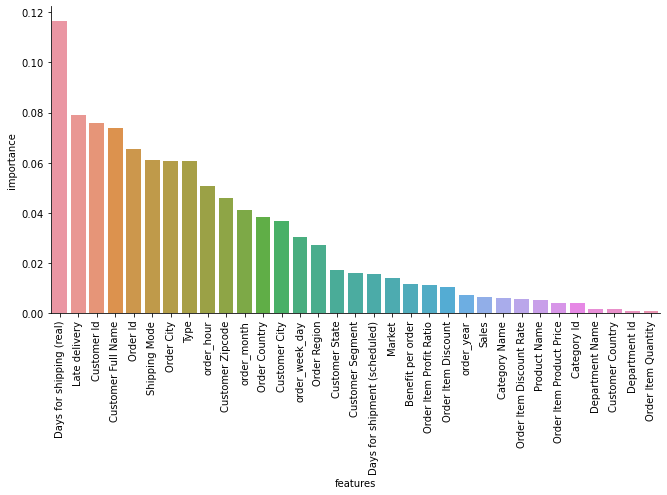

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
feat_importance = feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance',data=feat_importance,kind='bar',height=5,aspect=2)
plt.xticks(rotation=90)

In [41]:
#神经网络进行分类
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras.layers.BatchNormalization()
classifer = Sequential()
#第1层隐藏层
classifer.add(Dense(1024,activation='relu',kernel_initializer='random_normal',input_dim=33))
#第2层隐藏层
classifer.add(Dense(512,activation='relu',kernel_initializer='random_normal'))
#第3层隐藏层
classifer.add(Dense(256,activation='relu',kernel_initializer='random_normal'))
#第4层隐藏层
classifer.add(Dense(128,activation='relu',kernel_initializer='random_normal'))
#第5层隐藏层
classifer.add(Dense(64,activation='relu',kernel_initializer='random_normal'))
#第6层隐藏层
classifer.add(Dense(32,activation='relu',kernel_initializer='random_normal'))
#第7层隐藏层
classifer.add(Dense(16,activation='relu',kernel_initializer='random_normal'))
#第8层隐藏层
classifer.add(Dense(8,activation='relu',kernel_initializer='random_normal'))
#第9层隐藏层
classifer.add(Dense(4,activation='relu',kernel_initializer='random_normal'))
#第10层隐藏层
classifer.add(Dense(2,activation='relu',kernel_initializer='random_normal'))

#输出层
classifer.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

#优化器,损失函数
classifer.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#训练
classifer.fit(x_frand_train,y_frand_train,batch_size=512,epochs=2)



Epoch 1/2
283/283 [==============================] - 30s 105ms/step - loss: 0.1902 - accuracy: 0.9774
Epoch 2/2
283/283 [==============================] - 28s 100ms/step - loss: 0.0535 - accuracy: 0.9774


In [42]:
x_frand_train.shape

(144408, 33)

In [43]:
train_evaluate = classifer.evaluate(x_frand_train,y_frand_train)
test_evaluate = classifer.evaluate(x_frand_test,y_frand_test)
print('训练集准确率:',train_evaluate)
print('训练集准确率:',test_evaluate)

1129/1129 [==============================] - 4s 3ms/step - loss: 0.0539 - accuracy: 0.9778
训练集准确率: [0.05118706449866295, 0.9774112105369568]
训练集准确率: [0.05389108881354332, 0.9778411984443665]


In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
#投票
#eclf = VotingClassifier(estimators=[('LR', model_frand_lr), ('dt',model_frand_dt),('SVC',model_frand_svc)],voting='soft')
eclf = VotingClassifier(estimators=[('LR', model_frand_lr), ('dt',model_frand_dt)],voting='soft')
for clf,label in zip([model_frand_lr,model_frand_dt,eclf],['LR','dt','Voting']):
    #scores = cross_val_score(clf,x_frand,y_frand,cv=5,scoring='accuracy')
    scores = cross_val_score(clf,x_frand,y_frand,cv=5,scoring='f1')
    print("F1:%0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

F1:0.00(+/- 0.00)[LR]
F1:0.53(+/- 0.16)[dt]
F1:0.53(+/- 0.17)[Voting]


In [45]:
f1_list

{('Frand', LogisticRegression()): 0.30837004405286345,
 ('Late Delivery', LogisticRegression()): 0.9890342052313883,
 ('Frand', GaussianNB()): 0.269996625042187,
 ('Late Delivery', GaussianNB()): 0.7153590074766695,
 ('Frand', LinearSVC()): 0.2546468401486989,
 ('Late Delivery', LinearSVC()): 0.9890342052313883,
 ('Frand', DecisionTreeClassifier()): 0.8140394088669951,
 ('Late Delivery', DecisionTreeClassifier()): 0.9929059981184368}

In [46]:
eclf = VotingClassifier(estimators=[('LR', model_late_lr), ('dt',model_late_dt)],voting='soft')
for clf,label in zip([model_late_lr,model_late_dt,eclf],['LR','dt','Voting']):
    #scores = cross_val_score(clf,x_frand,y_frand,cv=5,scoring='accuracy')
    scores = cross_val_score(clf,x_late,y_late,cv=5,scoring='f1')
    print("F1:%0.2f(+/- %0.2f)[%s]"%(scores.mean(),scores.std(),label))

F1:0.71(+/- 0.00)[LR]
F1:0.98(+/- 0.01)[dt]
F1:0.98(+/- 0.01)[Voting]


In [47]:
#KNN模型
model_frand = KNeighborsClassifier(n_neighbors=1)
model_late  = KNeighborsClassifier(n_neighbors=1)
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model KNeighborsClassifier(n_neighbors=1)
model: KNeighborsClassifier(n_neighbors=1)
Frand accuracy:97.5403706063208%
Frand recall:43.51032448377581%
Frand auc:71.04238877682086%
Frand F1:39.91880920162381%
Frand confusion_matric:
[[34920   505]
 [  383   295]]
model KNeighborsClassifier(n_neighbors=1)
model: KNeighborsClassifier(n_neighbors=1)
Late Delivery accuracy:83.19807218236711%
Late Delivery recall:85.1245220626227%
Late Delivery auc:83.04826019544056%
Late Delivery F1:84.4525322944433%
Late Delivery confusion_matric:
[[13562  3187]
 [ 2879 16475]]


(0.8319807218236711,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.844525322944433)

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#LDA模型(线性判别)Linear Discriminant Analysis
model_frand= LinearDiscriminantAnalysis()
model_test = LinearDiscriminantAnalysis()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model LinearDiscriminantAnalysis()
model: LinearDiscriminantAnalysis()
Frand accuracy:97.86998310389718%
Frand recall:52.45641838351822%
Frand auc:75.5671243924808%
Frand F1:46.26135569531796%
Frand confusion_matric:
[[35003   469]
 [  300   331]]
model KNeighborsClassifier(n_neighbors=1)
model: KNeighborsClassifier(n_neighbors=1)
Late Delivery accuracy:83.19807218236711%
Late Delivery recall:85.1245220626227%
Late Delivery auc:83.04826019544056%
Late Delivery F1:84.4525322944433%
Late Delivery confusion_matric:
[[13562  3187]
 [ 2879 16475]]


(0.8319807218236711,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.844525322944433)

In [49]:
#随机森林
model_frand= RandomForestClassifier()
model_test = RandomForestClassifier()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model RandomForestClassifier()
model: RandomForestClassifier()
Frand accuracy:98.8006536852893%
Frand recall:97.41602067183463%
Frand auc:98.11583876015297%
Frand F1:63.521482729570344%
Frand confusion_matric:
[[35293   423]
 [   10   377]]
model KNeighborsClassifier(n_neighbors=1)
model: KNeighborsClassifier(n_neighbors=1)
Late Delivery accuracy:83.19807218236711%
Late Delivery recall:85.1245220626227%
Late Delivery auc:83.04826019544056%
Late Delivery F1:84.4525322944433%
Late Delivery confusion_matric:
[[13562  3187]
 [ 2879 16475]]


(0.8319807218236711,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.844525322944433)

In [50]:
#XGB
import xgboost as xgb
model_frand= xgb.XGBClassifier()
model_test = xgb.XGBClassifier()
#模型评估
model_stats(model_frand,x_frand_train,x_frand_test,y_frand_train,y_frand_test,'Frand')
model_stats(model_late,x_late_train,x_late_test,y_late_train,y_late_test,'Late Delivery')

model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_para

(0.8319807218236711,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 0.844525322944433)

In [51]:
print('accuracy_list:',accuracy_list)
print('auc_list:',auc_list)
print('f1_list:',f1_list)

accuracy_list: {('Frand', LogisticRegression()): 0.9782566545716422, ('Late Delivery', LogisticRegression()): 0.9879234412652688, ('Frand', GaussianNB()): 0.8801761626457635, ('Late Delivery', GaussianNB()): 0.5666011134808742, ('Frand', LinearSVC()): 0.9777857795751046, ('Late Delivery', LinearSVC()): 0.9879234412652688, ('Frand', DecisionTreeClassifier()): 0.991635044179154, ('Late Delivery', DecisionTreeClassifier()): 0.9922721103509403, ('Frand', KNeighborsClassifier(n_neighbors=1)): 0.975403706063208, ('Late Delivery', KNeighborsClassifier(n_neighbors=1)): 0.8319807218236711, ('Frand', LinearDiscriminantAnalysis()): 0.9786998310389718, ('Frand', RandomForestClassifier()): 0.9880065368528931, ('Frand', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
   

#回归模型
#对于销售额进行预测，即Sales字段
#对订货数量（ Order Item Quantity ）进行预测

In [52]:
x_sales = train_data.loc[:,train_data.columns!='Sales']
y_sales = train_data['Sales']

x_qty = train_data.loc[:,train_data.columns!='Order Item Quantity']
y_qty = train_data['Order Item Quantity']

In [53]:
#数据集切分
x_sales_train,x_sales_test,y_sales_train,y_sales_test = train_test_split(x_sales,y_sales,test_size=0.2)
x_qty_train,x_qty_test,y_qty_train,y_qty_test = train_test_split(x_qty,y_qty,test_size=0.2)

In [54]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
#回归模型model:MSE\MAE\RMSE指标
def regression_model_stats(model, x_train, x_test, y_train, y_test,model_name='Sales'):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Model:',model)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print('{} MSE :{}'.format(model_name,mse))
    print('{} RMSE :{}'.format(model_name,mse**0.05))
    print('{} MAE :{}'.format(model_name,mae))
    #return mse,mae
    return model

In [55]:
#LR
model_sales = LinearRegression()
model_qty = LinearRegression()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')


Model: LinearRegression()
Sales MSE :947.6869286316033
Sales RMSE :1.4087477795452126
Sales MAE :18.3668656476271
Model: LinearRegression()
qty MSE :0.2808520125939193
qty RMSE :0.9384775262518777
qty MAE :0.34750357944481336


LinearRegression()

In [56]:
#Lasso Regressor
model_sales = Lasso()
model_qty = Lasso()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')


Model: Lasso()
Sales MSE :1034.9747371398605
Sales RMSE :1.4149675738733394
Sales MAE :18.65575884530892
Model: Lasso()
qty MSE :0.30156170139849847
qty RMSE :0.941821953038843
qty MAE :0.36257321806887827


Lasso()

In [57]:
#Ridge Regressor
model_sales = Ridge()
model_qty = Ridge()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')


Model: Ridge()
Sales MSE :947.6787195506911
Sales RMSE :1.4087471693979297
Sales MAE :18.362070195069254
Model: Ridge()
qty MSE :0.2808516394000663
qty RMSE :0.938477463899776
qty MAE :0.34749878606914497


Ridge()

In [58]:
#树模型
model_sales = DecisionTreeRegressor()
model_qty = DecisionTreeRegressor()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')

Model: DecisionTreeRegressor()
Sales MSE :2.9080366748237782e-22
Sales RMSE :0.08378764692730825
Sales MAE :1.1083905425261738e-11
Model: DecisionTreeRegressor()
qty MSE :0.0
qty RMSE :0.0
qty MAE :0.0


DecisionTreeRegressor()

In [59]:
#XGB
model_sales_xgb = model_sales = xgb.XGBRegressor()
model_qty_xgb = model_qty = xgb.XGBRegressor()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')

Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
Sales MSE :0.011787225198099346
Sales RMSE :0.8008857732896758
Sales MAE :0.013231226237018535
Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

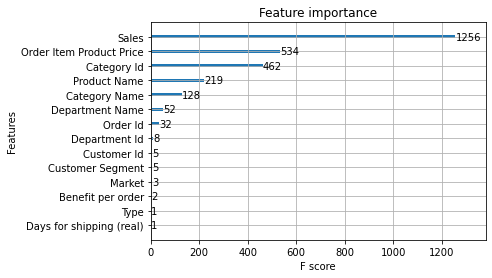

In [68]:
xgb.plot_importance(model_qty_xgb)

In [60]:
import lightgbm as lgb
model_sales_lgb = model_sales = lgb.LGBMRegressor()
model_qty_lgb =model_qty = lgb.LGBMRegressor()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')

Model: LGBMRegressor()
Sales MSE :8.971853802679018
Sales RMSE :1.1159483885650232
Sales MAE :0.1533431751247432
Model: LGBMRegressor()
qty MSE :4.144693513304227e-06
qty RMSE :0.5381144087976721
qty MAE :0.0003493714643792616


LGBMRegressor()

In [61]:
#随机森林
model_sales =RandomForestRegressor()
model_qty = RandomForestRegressor()
#评估
regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
regression_model_stats(model_qty, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='qty')

Model: RandomForestRegressor()
Sales MSE :0.006590884158988656
Sales RMSE :0.7779419370459958
Sales MAE :0.0006841841306996102
Model: RandomForestRegressor()
qty MSE :5.5397058416195735e-09
qty RMSE :0.38652210426395767
qty MAE :5.539705841619691e-07


RandomForestRegressor()

In [62]:
x_qty.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Sales', 'Order Region', 'Product Name',
       'Shipping Mode', 'Customer Full Name', 'order_year', 'order_month',
       'order_week_day', 'order_hour', 'frand', 'Late delivery'],
      dtype='object')

In [63]:
# xgboost和lightgbm进行融合
vot = VotingRegressor(estimators=(('XGBoost', model_sales_xgb), ('LightGBM',model_sales_lgb)))
vot = regression_model_stats(vot, x_sales_train, x_sales_test, y_sales_train, y_sales_test,model_name='Sales')
y_pred = vot.predict(x_sales_test)
print(y_pred)

Model: VotingRegressor(estimators=(('XGBoost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                              

In [64]:
vot = VotingRegressor(estimators=(('XGBoost', model_qty_xgb), ('LightGBM',model_qty_lgb)))
vot = regression_model_stats(vot, x_qty_train, x_qty_test, y_qty_train, y_qty_test,model_name='QTY')
y_pred = vot.predict(x_qty_test)
print(y_pred)

Model: VotingRegressor(estimators=(('XGBoost',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                              